# What are the most demanded skills for the top3 most populari roles?

## Methodology:

  ##### 1.Clean-up skill column
  ##### 2.Calculaates skil count based on job_title_short
  ##### 3.Calculates skill percentage
  ##### 4. Plot final findings

In [1]:
#importing libraries

import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

#loading data

ds = load_dataset("lukebarousse/data_jobs")
df=ds['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])


pd.reset_option('display.max_rows',None)

df['job_skills']=df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_pl=df[df['job_country']=='Poland']


df_skills=df_pl.explode('job_skills')

df_skills[['job_title','job_skills']]

df_skills_count=df_skills.groupby(['job_skills','job_title_short']).size()

df_skills_count=df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
912,python,Data Engineer,2240
1160,sql,Data Engineer,2231
1159,sql,Data Analyst,1572
93,azure,Data Engineer,1453
83,aws,Data Engineer,1251
...,...,...,...
1359,webex,Data Engineer,1
1357,watson,Senior Data Analyst,1
1355,watson,Data Analyst,1
1372,wire,Cloud Engineer,1


In [3]:
job_titles=df_skills_count['job_title_short'].unique().tolist()

job_titles=sorted(job_titles[0:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

In [4]:
df_job_title_count=df_pl['job_title_short'].value_counts().reset_index(name='jobs_total')

In [5]:
df_skills_perc=pd.merge(df_skills_count,df_job_title_count,how='left',on='job_title_short')

In [6]:
df_skills_perc['skill_percent']=100*df_skills_perc['skill_count']/df_skills_perc['jobs_total']

In [7]:
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Engineer,2240,3540,63.276836
1,sql,Data Engineer,2231,3540,63.022599
2,sql,Data Analyst,1572,3172,49.558638
3,azure,Data Engineer,1453,3540,41.045198
4,aws,Data Engineer,1251,3540,35.338983
...,...,...,...,...,...
1399,webex,Data Engineer,1,3540,0.028249
1400,watson,Senior Data Analyst,1,609,0.164204
1401,watson,Data Analyst,1,3172,0.031526
1402,wire,Cloud Engineer,1,393,0.254453


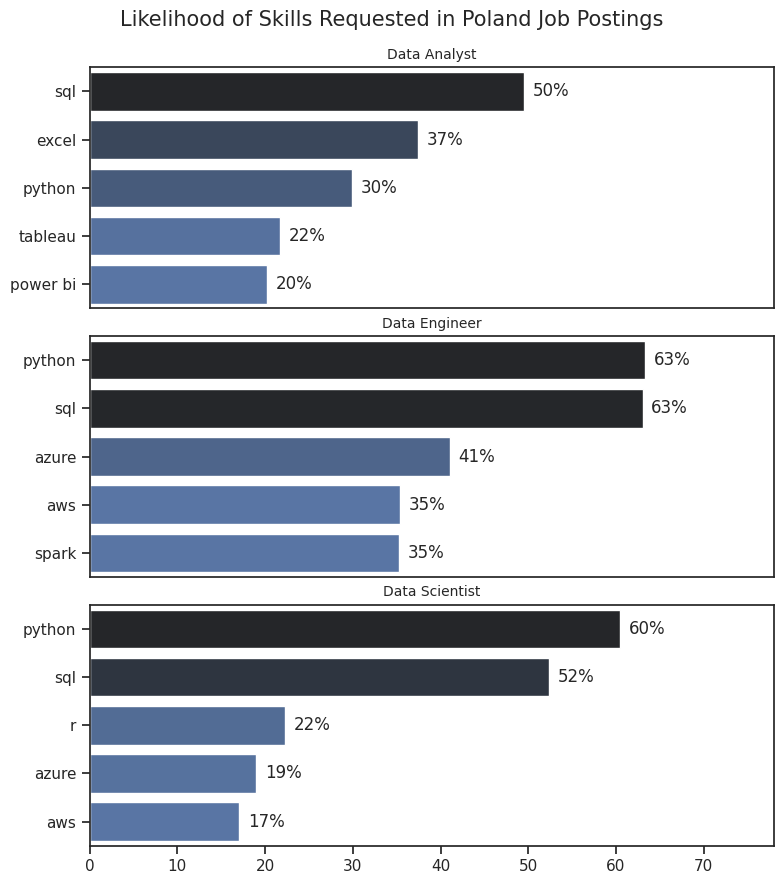

In [11]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(8, len(job_titles) * 3))  # Smaller height multiplier

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    # Filter and get top 5 rows
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    
    # Pass the actual DataFrame to sns.barplot
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    
    # Set the title and remove redundant labels
    ax[i].set_title(job_title, fontsize=10)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    
    # Remove the legend
    ax[i].get_legend().remove()
    
    # Set x-axis limits
    ax[i].set_xlim(0, 78)
    
    # Add text annotations for the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')  # Adjust positioning for better readability
        if i !=len(job_titles)-1:
            ax[i].set_xticks([])

        


# Set a common title and adjust layout
fig.suptitle('Likelihood of Skills Requested in Poland Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()
